# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow import keras

# Data

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


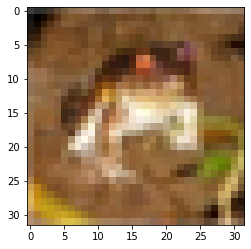

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Let's have some fun and see what these labels refer to using scaping by selenium

In [8]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.zxCzJHia6Y/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.TKOwmgRndX/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.1tJDkOgEiP/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

options = Options()
options.add_argument("--headless") # or use pyvirtualdiplay
options.add_argument("--no-sandbox") # needed, because colab runs as root
options.headless = True

driver = webdriver.Chrome(service=Service(executable_path="/usr/bin/chromedriver"), options=options)
driver.get('https://keras.io/api/datasets/cifar10/')


labels = driver.find_elements(By.XPATH,"//td")

print()
for label in labels:
  print(label.text)

<ipython-input-9-5bf4e5feb7a6>:9: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True



0
airplane
1
automobile
2
bird
3
cat
4
deer
5
dog
6
frog
7
horse
8
ship
9
truck


In [10]:
labels_dict = {}

for label_code, label_category in zip(labels[::2], labels[1::2]):
  labels_dict[int(label_code.text)] = label_category.text

labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [11]:
y_train_categories = list(map(lambda i: labels_dict[i], y_train.flatten()))
y_test_categories = list(map(lambda i: labels_dict[i], y_test.flatten()))

In [12]:
y_train_categories

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'deer',
 'horse',
 'horse',
 'bird',
 'truck',
 'truck',
 'truck',
 'cat',
 'bird',
 'frog',
 'deer',
 'cat',
 'frog',
 'frog',
 'bird',
 'frog',
 'cat',
 'dog',
 'deer',
 'airplane',
 'airplane',
 'truck',
 'automobile',
 'cat',
 'deer',
 'airplane',
 'cat',
 'horse',
 'cat',
 'cat',
 'dog',
 'bird',
 'bird',
 'horse',
 'automobile',
 'automobile',
 'automobile',
 'bird',
 'bird',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'bird',
 'bird',
 'dog',
 'bird',
 'deer',
 'cat',
 'automobile',
 'automobile',
 'ship',
 'bird',
 'automobile',
 'automobile',
 'deer',
 'truck',
 'horse',
 'ship',
 'dog',
 'truck',
 'frog',
 'horse',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'cat',
 'automobile',
 'cat',
 'dog',
 'deer',
 'dog',
 'horse',
 'horse',
 'deer',
 'horse',
 'truck',
 'deer',
 'bird',
 'cat',
 'ship',
 'airplane',
 'automobile',
 'frog',
 'automobile',
 'automobile',
 

Show unique values

In [13]:
set(y_train_categories)

{'airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck'}

# Visualize Data

##### Train

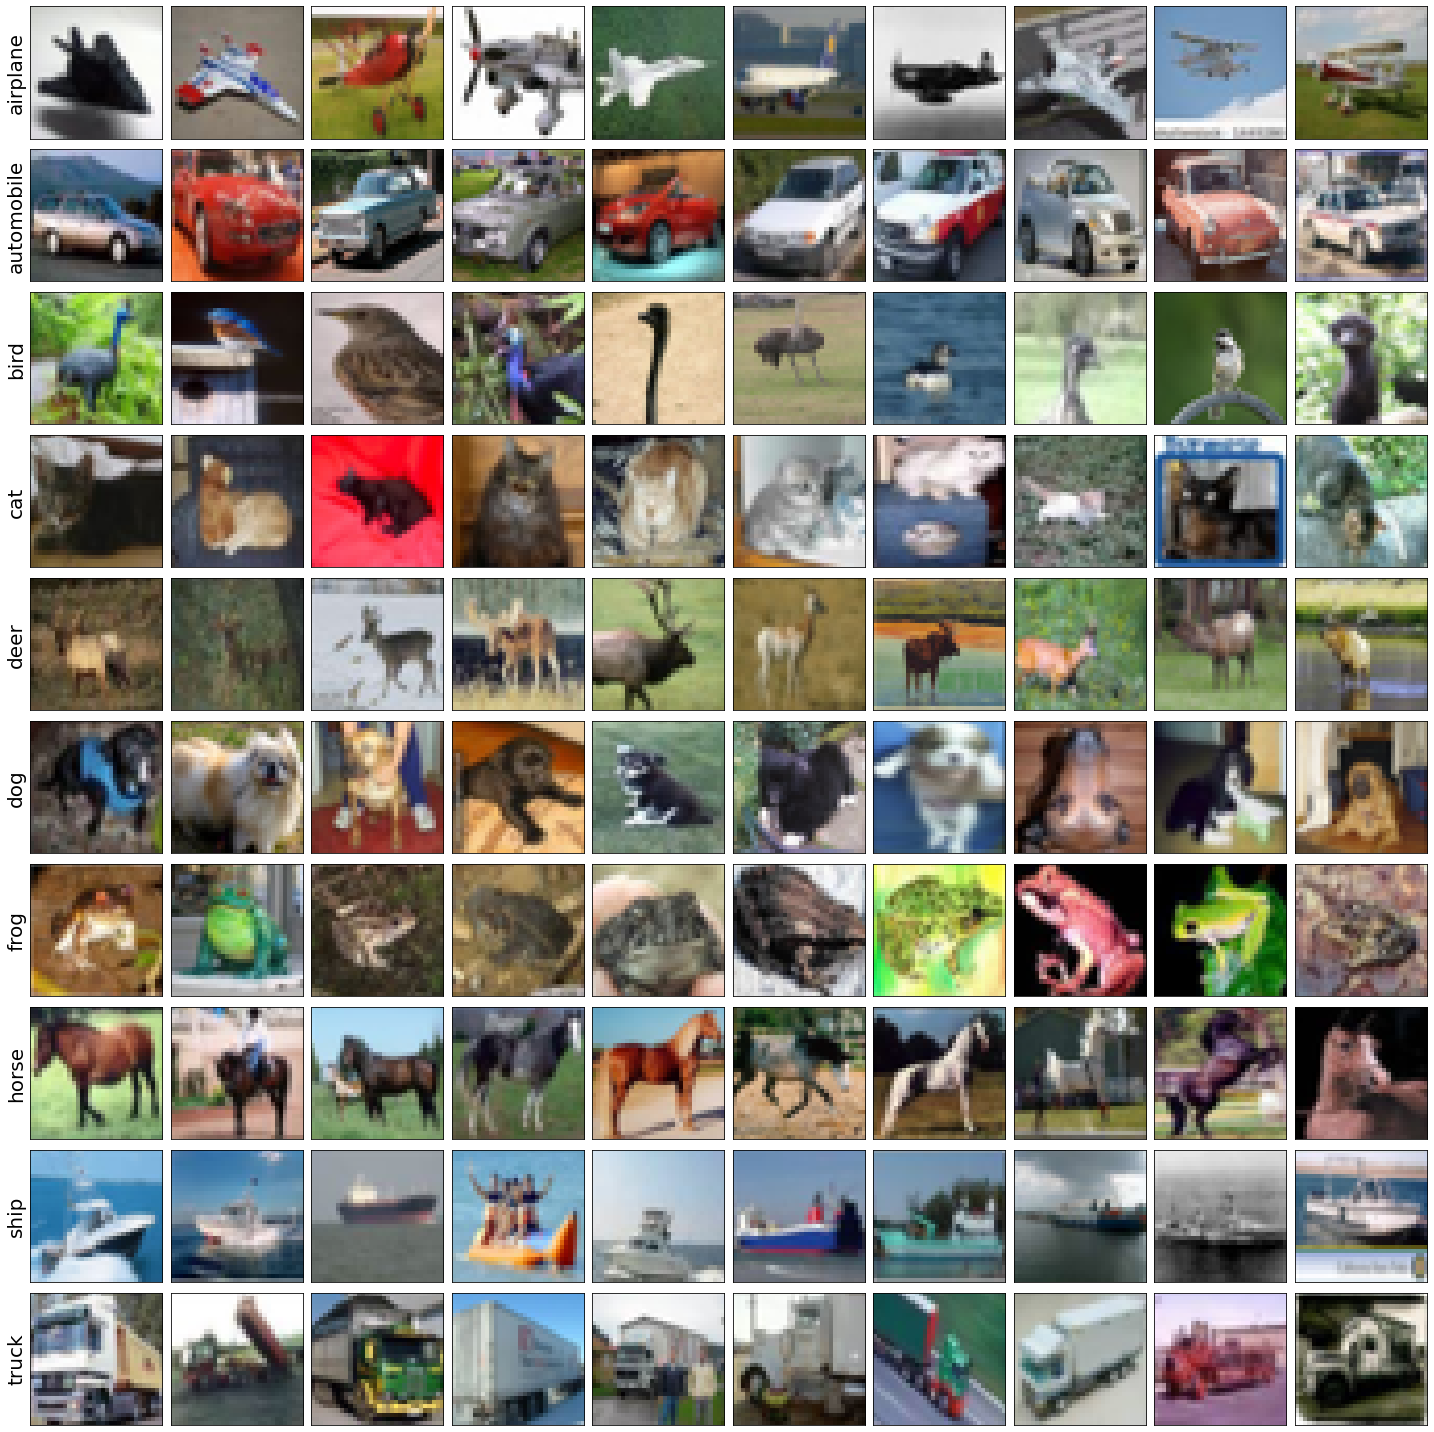

In [14]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_train)

for i, label in enumerate(labels):
  class_indices = np.where(y_train.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    ax[i, j].imshow(X_train[class_index])
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

    if j == 0 :
      ax[i, j].set_ylabel(y_train_categories[class_index], fontsize=20)

plt.tight_layout()        

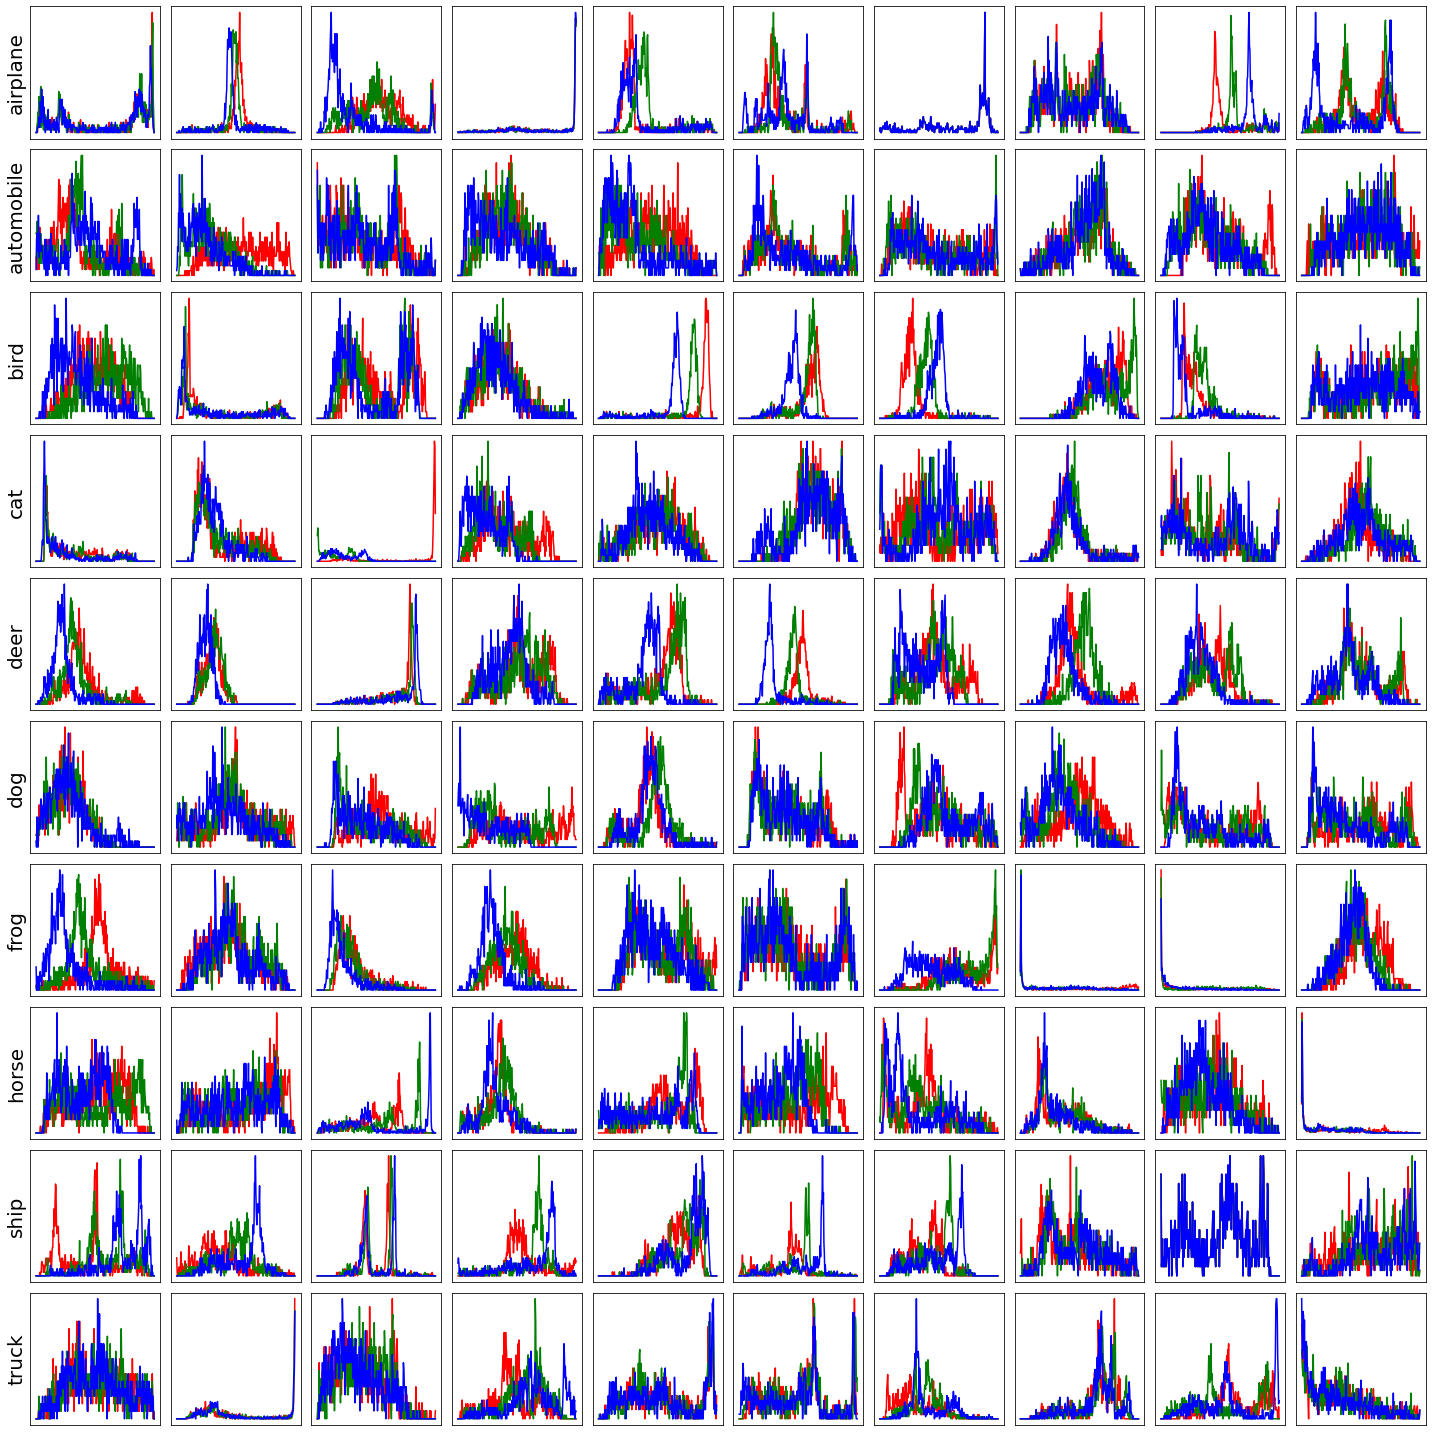

In [15]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_train)
colors = ('r', 'g', 'b')

for i, label in enumerate(labels):
  class_indices = np.where(y_train.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    
    # plot distribution of each channel
    for c, col in enumerate(colors):
      hist = cv2.calcHist([X_train[class_index]], [c], None, [256], [0, 256])
      ax[i, j].plot(hist, color=col)
    
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_ylabel('')

    if j == 0 :
      ax[i, j].set_ylabel(y_train_categories[class_index], fontsize=20)

plt.tight_layout()

##### Test

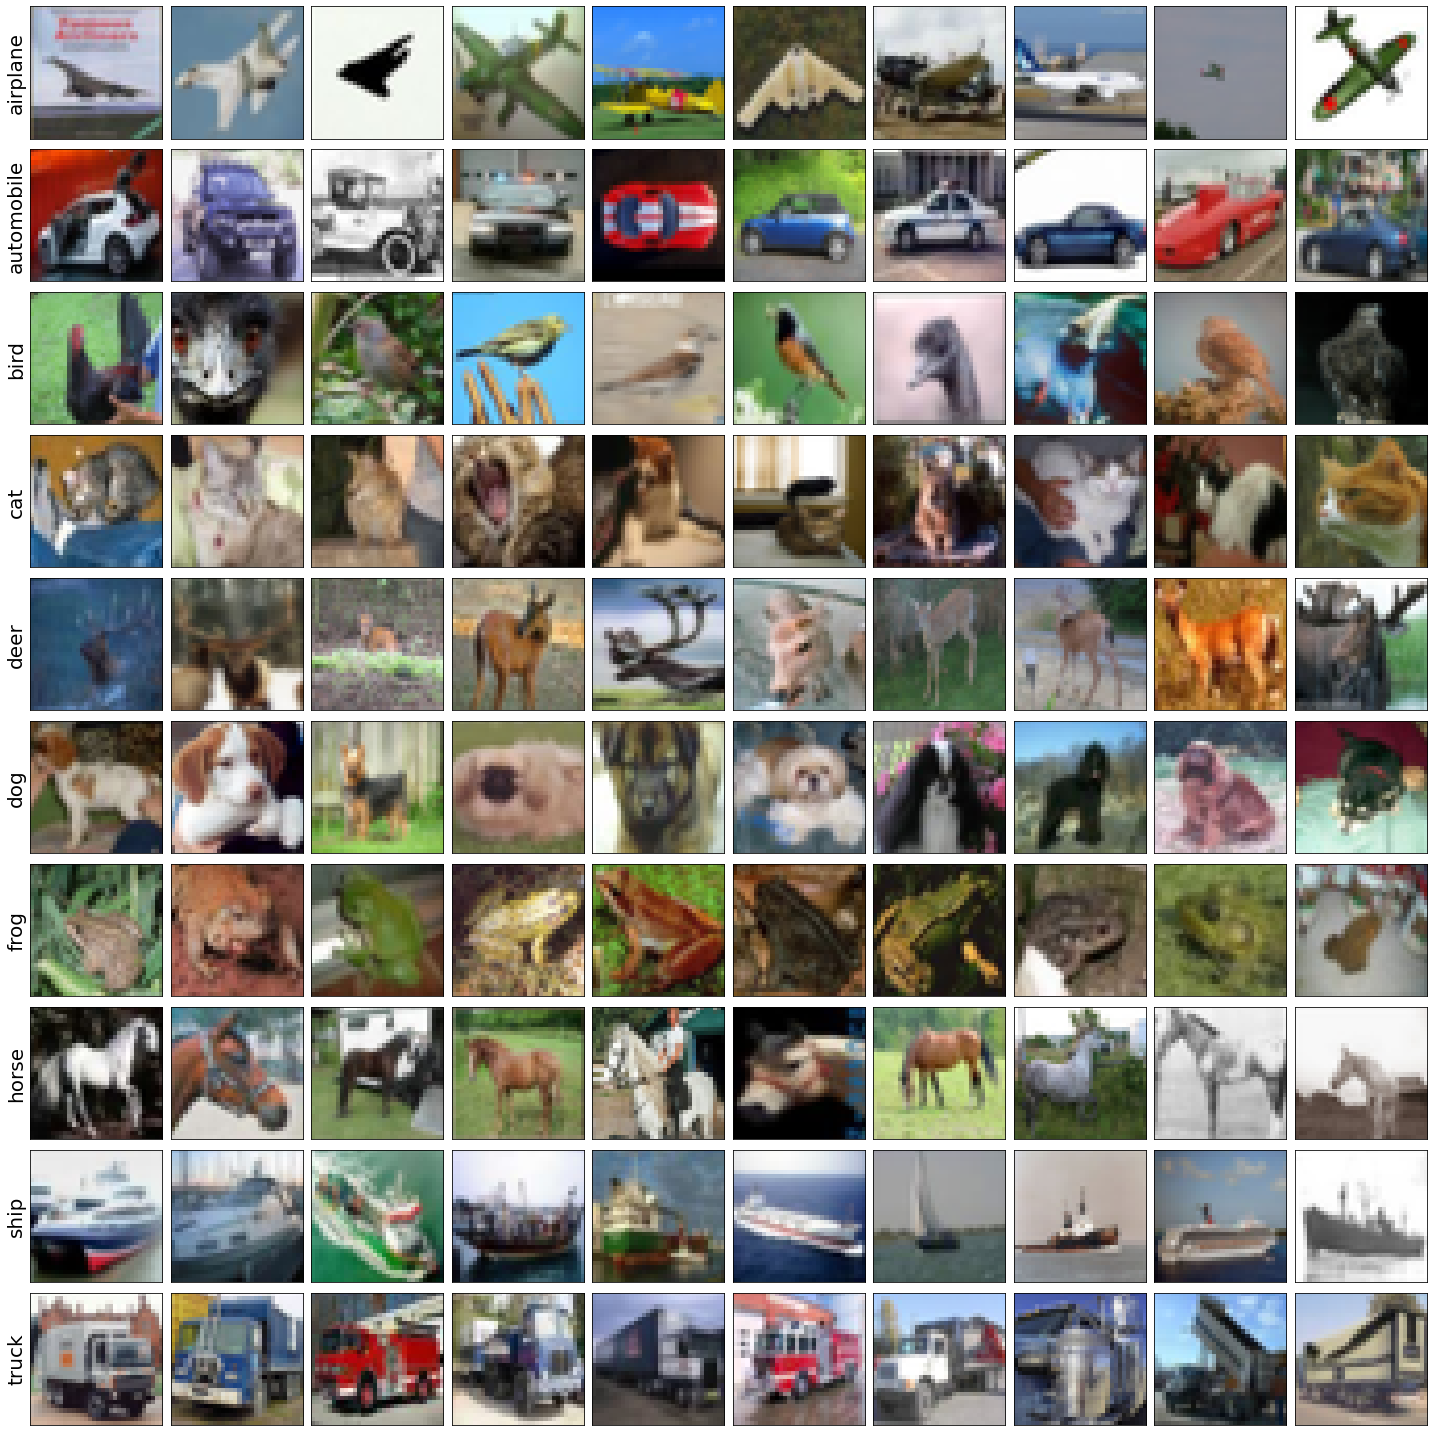

In [16]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_test)

for i, label in enumerate(labels):
  class_indices = np.where(y_test.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    ax[i, j].imshow(X_test[class_index])
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

    if j == 0 :
      ax[i, j].set_ylabel(y_test_categories[class_index], fontsize=20)

plt.tight_layout()        

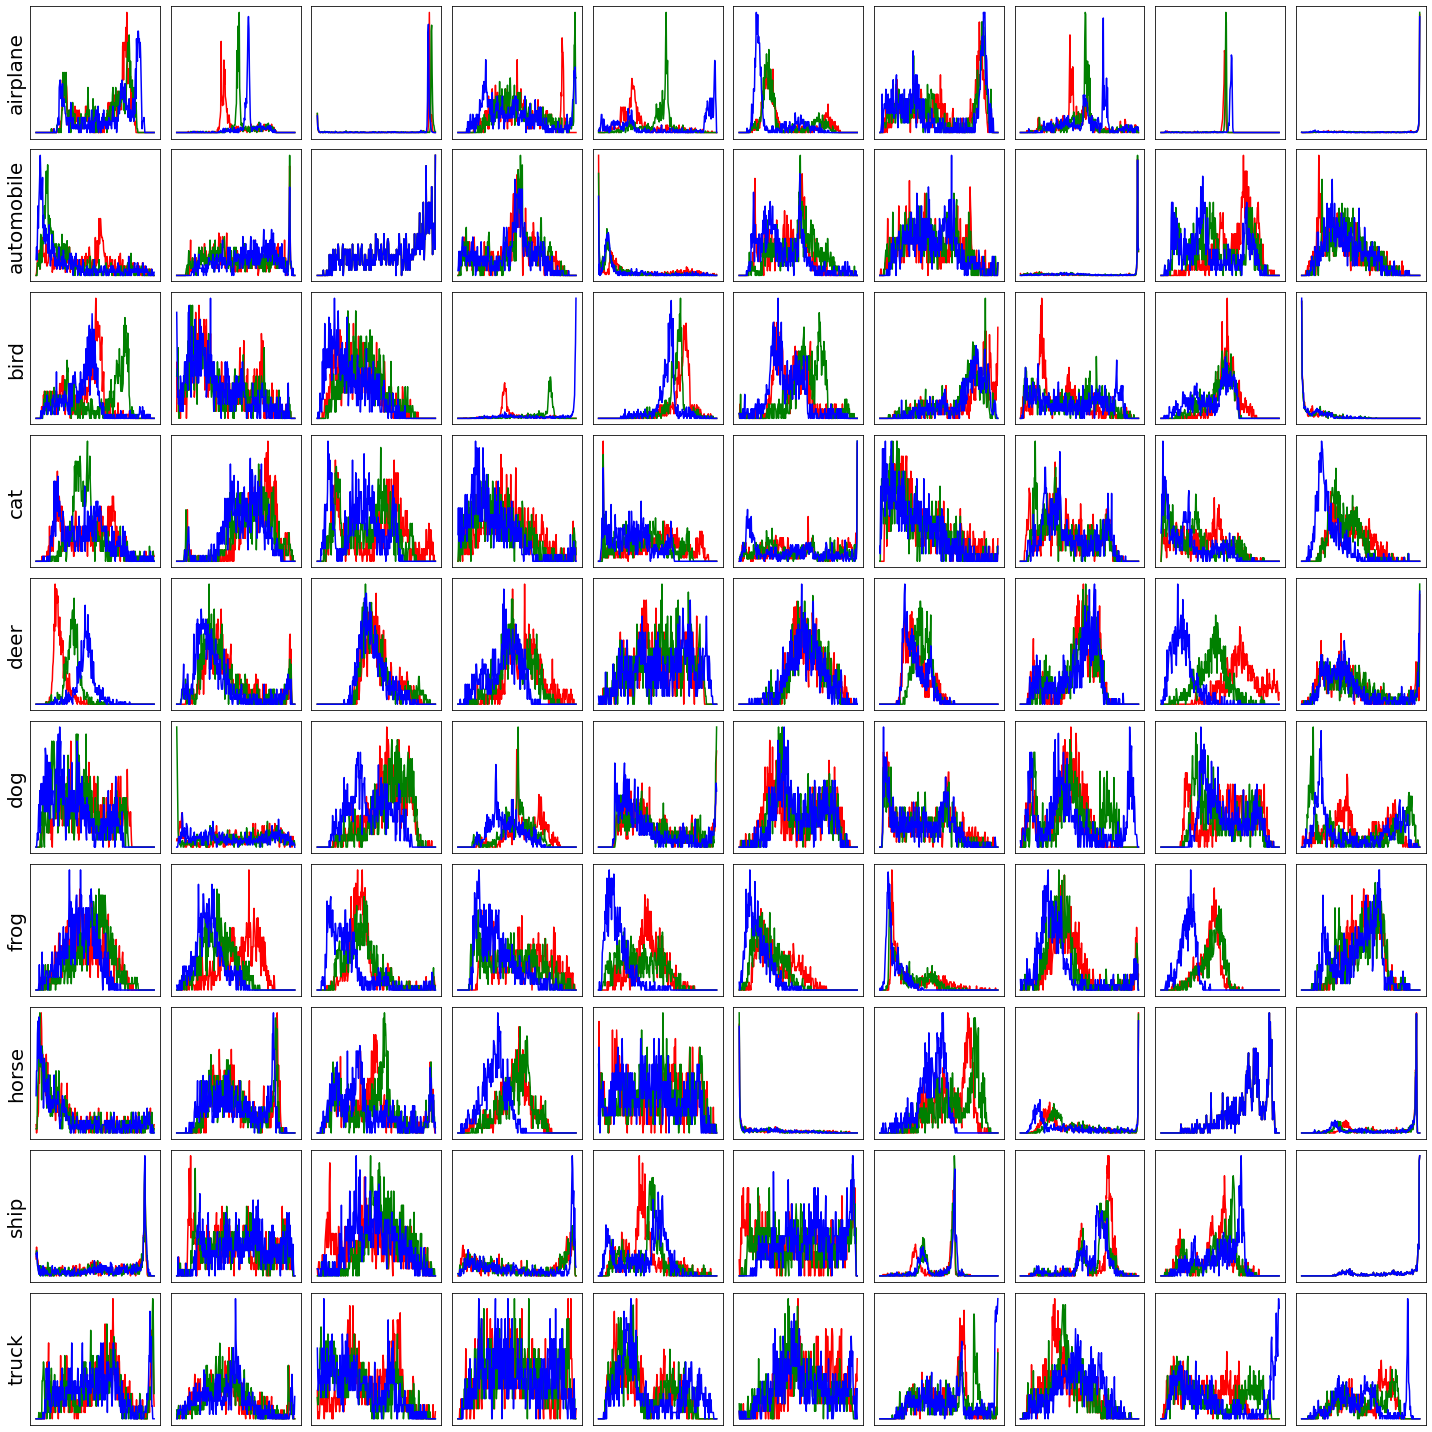

In [17]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_test)
colors = ('r', 'g', 'b')

for i, label in enumerate(labels):
  class_indices = np.where(y_test.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    
    # plot distribution of each channel
    for c, col in enumerate(colors):
      hist = cv2.calcHist([X_test[class_index]], [c], None, [256], [0, 256])
      ax[i, j].plot(hist, color=col)
    
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_ylabel('')

    if j == 0 :
      ax[i, j].set_ylabel(y_test_categories[class_index], fontsize=20)

plt.tight_layout()

# Image Processing
Convert imges to grayscale to reduce dimensions

##### Train

In [18]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])

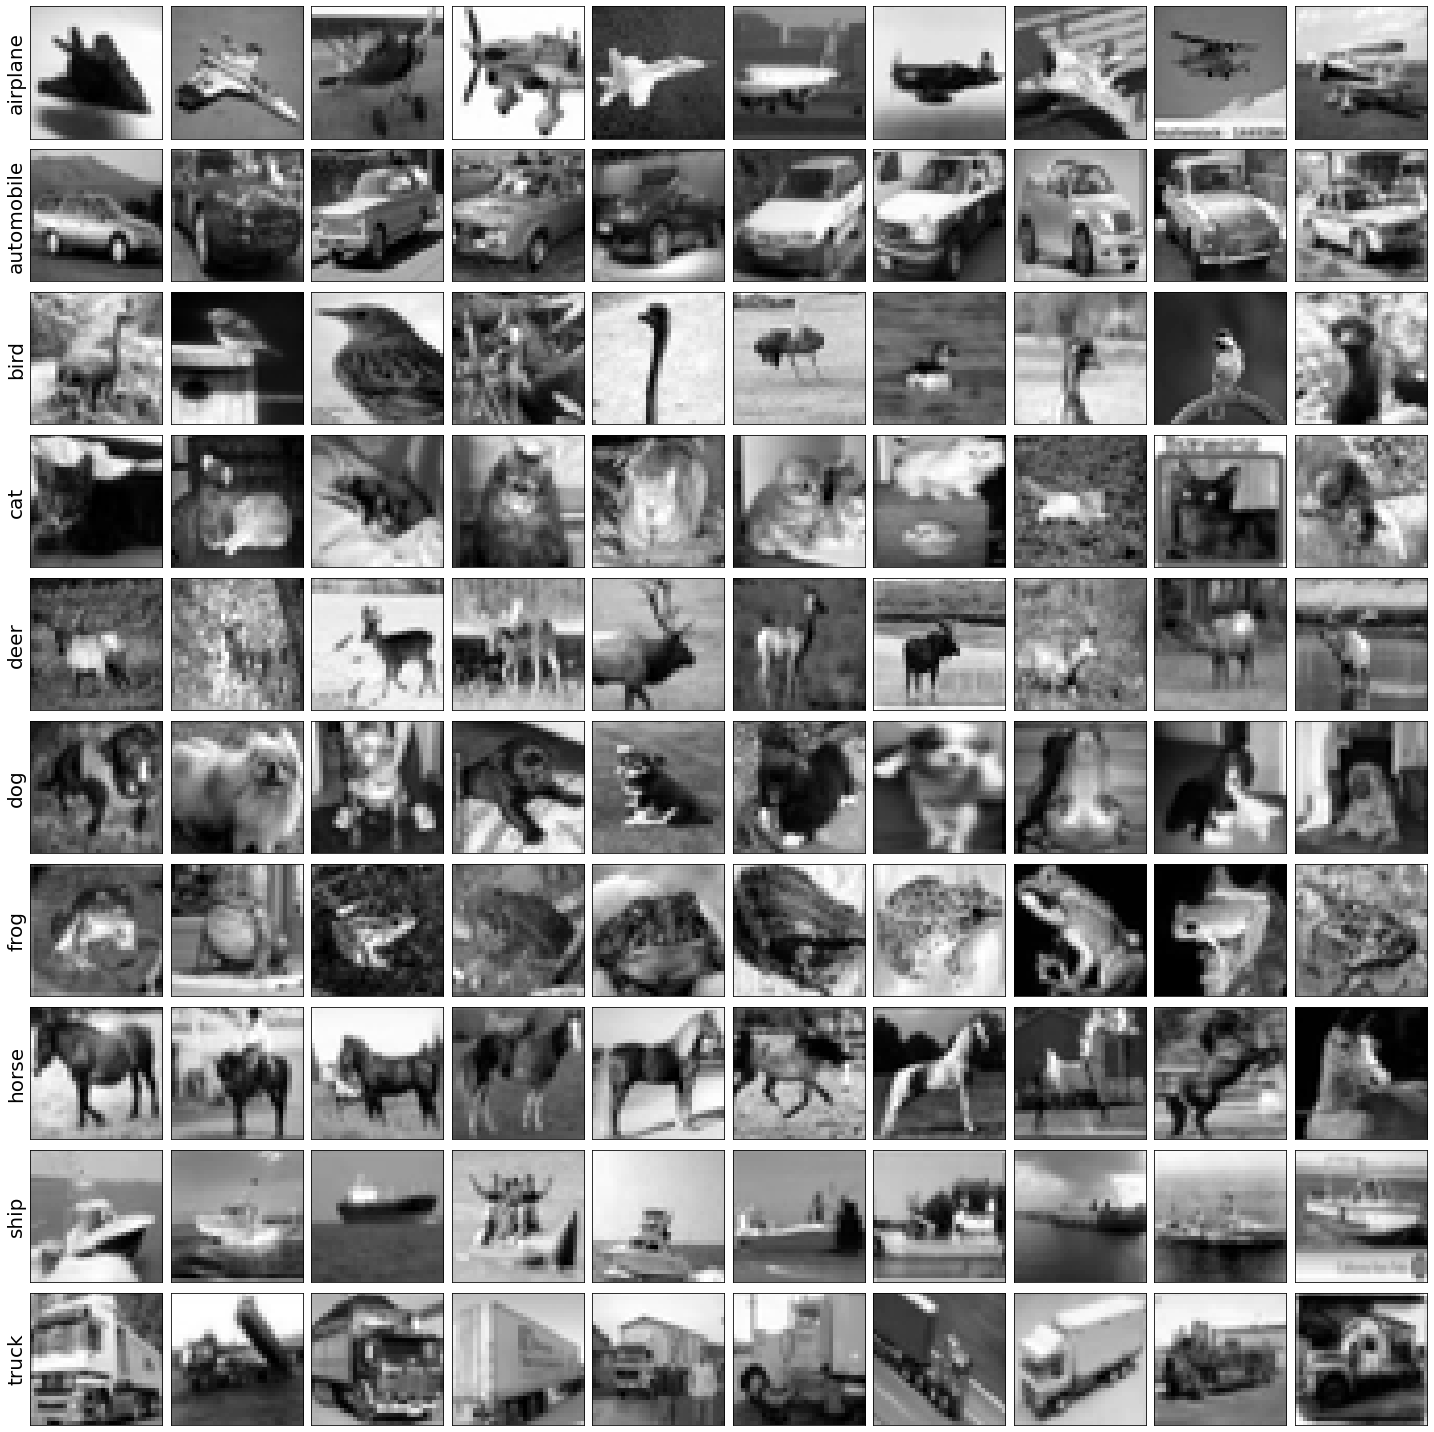

In [19]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_train)

for i, label in enumerate(labels):
  class_indices = np.where(y_train.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    ax[i, j].imshow(X_train[class_index], cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

    if j == 0 :
      ax[i, j].set_ylabel(y_train_categories[class_index], fontsize=20)

plt.tight_layout()        

##### Test

In [20]:
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

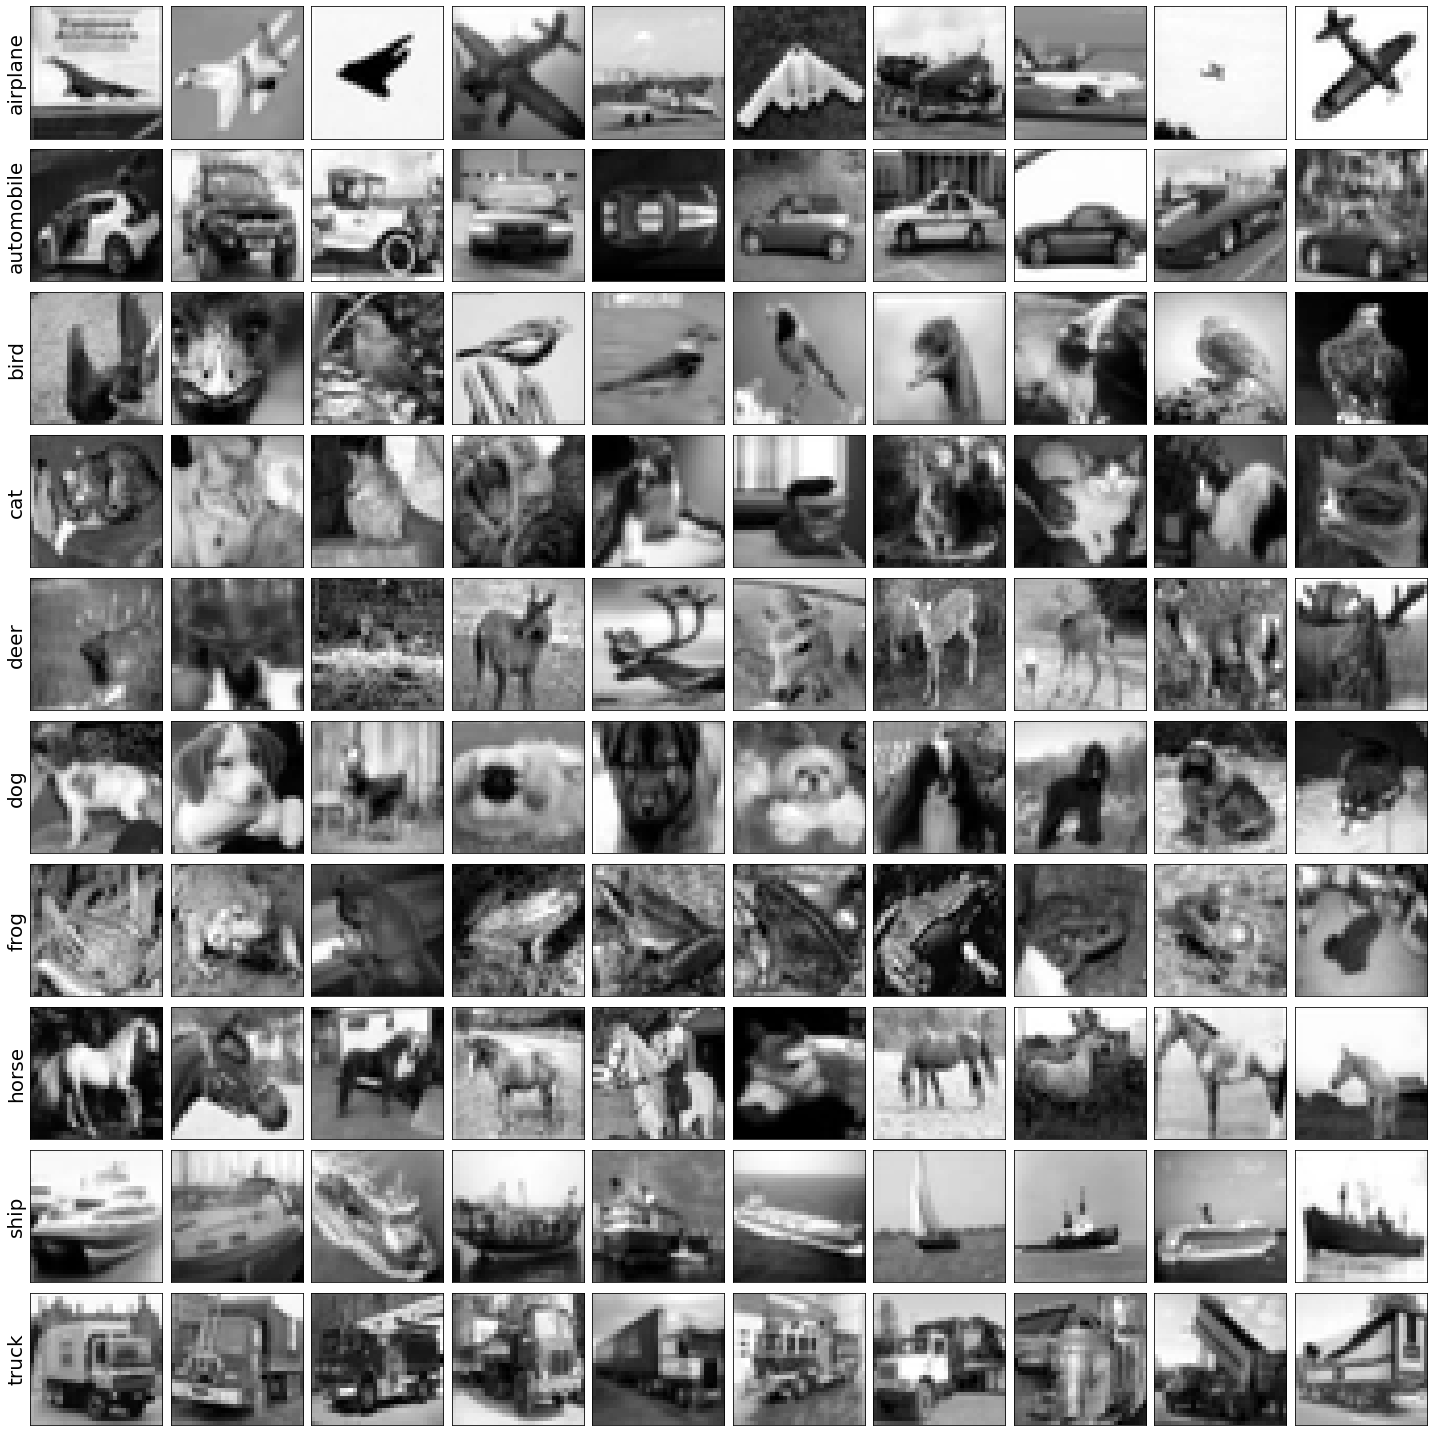

In [21]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_test)

for i, label in enumerate(labels):
  class_indices = np.where(y_test.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    ax[i, j].imshow(X_test[class_index], cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

    if j == 0 :
      ax[i, j].set_ylabel(y_test_categories[class_index], fontsize=20)

plt.tight_layout()        

##### Normalization

In [22]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

##### Flatten

In [23]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32)
(10000, 32, 32)


In [24]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [25]:
print(X_train.shape)
print(X_test.shape)

(50000, 1024)
(10000, 1024)


# Label Encoding

In [26]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
y_train.shape

(50000, 10)

# Model

Architecture

In [28]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', name='layer_1', input_shape=(32 * 32, )))
network.add(layers.Dense(256, activation='relu', name='layer_2'))
network.add(layers.Dense(128, activation='relu', name='layer_3'))
network.add(layers.Dense(10, activation='softmax'))

In [29]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 512)               524800    
                                                                 
 layer_2 (Dense)             (None, 256)               131328    
                                                                 
 layer_3 (Dense)             (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 690,314
Trainable params: 690,314
Non-trainable params: 0
_________________________________________________________________


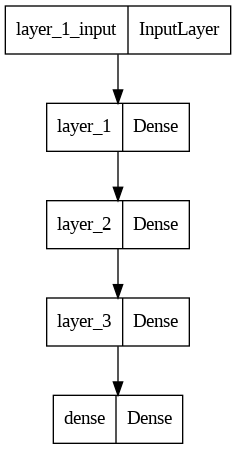

In [30]:
from keras.utils import plot_model

plot_model(network)

Loss and Optimizer

In [31]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Training

In [32]:
network.fit(X_train, y_train, epochs=30, batch_size=256)

Epoch 1/30
196/196 [==============================] - 10s 43ms/step - loss: 2.1453 - accuracy: 0.2093
Epoch 2/30
196/196 [==============================] - 9s 45ms/step - loss: 1.9731 - accuracy: 0.2903
Epoch 3/30
196/196 [==============================] - 9s 44ms/step - loss: 1.8919 - accuracy: 0.3225
Epoch 4/30
196/196 [==============================] - 8s 42ms/step - loss: 1.8380 - accuracy: 0.3443
Epoch 5/30
196/196 [==============================] - 8s 42ms/step - loss: 1.7899 - accuracy: 0.3646
Epoch 6/30
196/196 [==============================] - 8s 42ms/step - loss: 1.7521 - accuracy: 0.3783
Epoch 7/30
196/196 [==============================] - 6s 29ms/step - loss: 1.7073 - accuracy: 0.3944
Epoch 8/30
196/196 [==============================] - 5s 26ms/step - loss: 1.6757 - accuracy: 0.4052
Epoch 9/30
196/196 [==============================] - 9s 44ms/step - loss: 1.6432 - accuracy: 0.4166
Epoch 10/30
196/196 [==============================] - 8s 42ms/step - loss: 1.6122 - accur

Evaluation

In [33]:
_ = network.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.7990 - accuracy: 0.4186


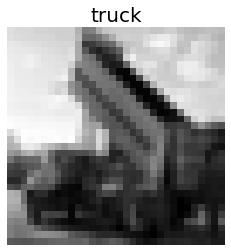

In [34]:
img_index = 50
img = X_test[img_index]
plt.imshow(np.reshape(img, (32, 32)), cmap='gray')
plt.axis('off')
_ = plt.title(y_test_categories[img_index], fontsize=20)

In [35]:
labels_dict[np.argmax(network.predict(img.reshape(1, -1)))]

1/1 [==============================] - 0s 186ms/step


'truck'

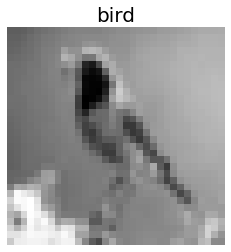

In [39]:
img_index = 75
img = X_test[img_index]
plt.imshow(np.reshape(img, (32, 32)), cmap='gray')
plt.axis('off')
_ = plt.title(y_test_categories[img_index], fontsize=20)

In [40]:
labels_dict[np.argmax(network.predict(img.reshape(1, -1)))]

1/1 [==============================] - 0s 40ms/step


'cat'